Markdowns??

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = 'Unnamed: 0')
    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = 'Unnamed: 0')
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

'''
    outcomes = outcomes[pd.notnull(outcomes.CityName)]
behaviors = behaviors[pd.notnull(behaviors.CityName)]

outcomes.drop(['Category', 'UniqueID', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'MeasureId'], axis = 1, inplace = True)
behaviors.drop(['Category', 'UniqueID', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'MeasureId'], axis = 1, inplace = True)



outcomes = outcomes[outcomes.Data_Value_Type != 'Crude prevalence']
behaviors = behaviors[behaviors.Data_Value_Type != 'Crude prevalence']
''' 

display(outcomes.head())
display(behaviors.head())

Health Outcomes dataset has 6500 samples with 8 features each.
Unhealthy Behaviors dataset has 2500 samples with 8 features each.


,Year,StateDesc,CityName,Measure,Data_Value_Type,Data_Value,GeoLocation,Short_Question_Text
26,2014,Alabama,Birmingham,Arthritis among adults aged >=18 Years,Age-adjusted prevalence,32.6,"(33.5275663773, -86.7988174678)",Arthritis
126,2013,Alabama,Birmingham,High blood pressure among adults aged >=18 Years,Age-adjusted prevalence,45.9,"(33.5275663773, -86.7988174678)",High Blood Pressure
227,2014,Alabama,Birmingham,Cancer (excluding skin cancer) among adults ag...,Age-adjusted prevalence,6.1,"(33.5275663773, -86.7988174678)",Cancer (except skin)
326,2014,Alabama,Birmingham,Current asthma among adults aged >=18 Years,Age-adjusted prevalence,11.4,"(33.5275663773, -86.7988174678)",Current Asthma
426,2014,Alabama,Birmingham,Coronary heart disease among adults aged >=18 ...,Age-adjusted prevalence,7.6,"(33.5275663773, -86.7988174678)",Coronary Heart Disease


,Year,StateDesc,CityName,Measure,Data_Value_Type,Data_Value,GeoLocation,Short_Question_Text
10,2014,Alabama,Birmingham,Binge drinking among adults aged >=18 Years,Age-adjusted prevalence,11.4,"(33.5275663773, -86.7988174678)",Binge Drinking
121,2014,Alabama,Birmingham,Current smoking among adults aged >=18 Years,Age-adjusted prevalence,22.0,"(33.5275663773, -86.7988174678)",Current Smoking
217,2014,Alabama,Birmingham,No leisure-time physical activity among adults...,Age-adjusted prevalence,31.7,"(33.5275663773, -86.7988174678)",Physical Activity
317,2014,Alabama,Birmingham,Obesity among adults aged >=18 Years,Age-adjusted prevalence,39.0,"(33.5275663773, -86.7988174678)",Obesity
410,2014,Alabama,Birmingham,Sleeping less than 7 hours among adults aged >...,Age-adjusted prevalence,46.9,"(33.5275663773, -86.7988174678)",Sleep


In [2]:

outcomes['Data_Value'].dtypes
#display(outcomes.iloc[0]) #['CityName'])



dtype('float64')

In [3]:
disease_types = outcomes.Short_Question_Text.unique()
print disease_types
import sys
behavior_types = behaviors.Short_Question_Text.unique()
print "behavior types"
print behavior_types

['Arthritis' 'High Blood Pressure' 'Cancer (except skin)' 'Current Asthma'
 'Coronary Heart Disease' 'COPD' 'Diabetes' 'High Cholesterol'
 'Chronic Kidney Disease' 'Mental Health' 'Physical Health' 'Stroke'
 'Teeth Loss']
behavior types
['Binge Drinking' 'Current Smoking' 'Physical Activity' 'Obesity' 'Sleep']


In [4]:
#display(behave_data.head())


outcomes_head =  outcomes.head(10)
behaviors_head = behaviors.head(10)

#display(head)
outcome = outcomes_head.iloc[0]
behavior = behaviors_head.iloc[0]

outcomes_dict = {outcome.CityName:{outcome.Short_Question_Text: 0}}
behaviors_dict = {behavior.CityName:{behavior.Short_Question_Text: 0}}

for item in outcomes.itertuples():
    
    if item.CityName in outcomes_dict:
        outcomes_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        outcomes_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    outcomes_dict[item.CityName]['GeoLat'] = float(geo_lat)
    outcomes_dict[item.CityName]['GeoLong'] = float(geo_long)
    
for item in behaviors.itertuples():
    if item.CityName in behaviors_dict:
        behaviors_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        behaviors_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    behaviors_dict[item.CityName]['GeoLat'] = float(geo_lat)
    behaviors_dict[item.CityName]['GeoLong'] = float(geo_long)
    
    
    #behaviors_dict[item.CityName]['GeoLocation'] = item.GeoLocation
    
print item
    
    
'''
test_dict = {lil_head.StateDesc:{lil_head.CityName:{lil_head.Short_Question_Text: 0}}}
display(test_dict)      


for item in head.itertuples():
    #display(item.StateDesc, item.CityName, item.Short_Question_Text)
    #display(item.Data_Value)
    if item.StateDesc in test_dict:
        if item.CityName in test_dict[item.StateDesc]:
            test_dict[item.StateDesc][item.CityName][item.Short_Question_Text] = item.Data_Value
            #print "{}   {}   {}".format(item.StateDesc, item.CityName, item.Short_Question_Text)
        else:
            test_dict[item.StateDesc][item.CityName] = {item.Short_Question_Text:item.Data_Value}
            #print "{}   {}".format(item.StateDesc, item.CityName)
    else:
        test_dict[item.StateDesc] = {item.CityName:{item.Short_Question:item.Data_Value}}
        print "{}".format(item.StateDesc)

'''        
#display(len(outcomes_dict))
#display(outcomes_dict['Birmingham']['Cancer (except skin)'])

display(outcomes_dict['Birmingham'].keys())

display(behaviors_dict['Birmingham'].keys())

Pandas(Index=145012, Year=2014, StateDesc='Wyoming', CityName='Cheyenne', Measure='Sleeping less than 7 hours among adults aged >=18 Years', Data_Value_Type='Age-adjusted prevalence', Data_Value=31.399999999999999, GeoLocation='(41.1460804265, -104.789064332)', Short_Question_Text='Sleep')


['Chronic Kidney Disease',
 'GeoLat',
 'COPD',
 'Cancer (except skin)',
 'Arthritis',
 'Mental Health',
 'GeoLong',
 'Teeth Loss',
 'Stroke',
 'High Cholesterol',
 'Current Asthma',
 'Diabetes',
 'Physical Health',
 'High Blood Pressure',
 'Coronary Heart Disease']

['GeoLat',
 'Current Smoking',
 'Physical Activity',
 'GeoLong',
 'Binge Drinking',
 'Sleep',
 'Obesity']

In [5]:
outcomes_df = pd.DataFrame.from_dict(outcomes_dict, 'index')
behaviors_df = pd.DataFrame.from_dict(behaviors_dict, 'index')

#display(outcomes_df.Arthritis.head())
#display(outcomes_df.dtypes)
#display(behaviors_df.dtypes)

In [6]:
#outcomes_df.to_csv('500_Cities_Health_Outcomes.csv')

In [7]:
#behaviors_df.to_csv('500_Cities_Health_Behaviors.csv')

In [8]:
outcomes_df = pd.read_csv('500_Cities_Health_Outcomes.csv')
behaviors_df = pd.read_csv('500_Cities_Health_Behaviors.csv')
#outcomes_df = outcomes_df.drop('GeoLong', 1, inplace = True)
#outcomes_df = outcomes_df.drop('GeoLat', 1, inplace = True)
outcomes_df.columns
outcomes_df.drop('GeoLong', 1, inplace = True)
outcomes_df.columns

Index([u'Unnamed: 0', u'Chronic Kidney Disease', u'GeoLat', u'COPD',
       u'Cancer (except skin)', u'Arthritis', u'Mental Health', u'Teeth Loss',
       u'Stroke', u'High Cholesterol', u'Current Asthma', u'Diabetes',
       u'Physical Health', u'High Blood Pressure', u'Coronary Heart Disease'],
      dtype='object')

In [9]:
outcomes_df.drop('GeoLat', 1, inplace = True)
outcomes_df.columns

Index([u'Unnamed: 0', u'Chronic Kidney Disease', u'COPD',
       u'Cancer (except skin)', u'Arthritis', u'Mental Health', u'Teeth Loss',
       u'Stroke', u'High Cholesterol', u'Current Asthma', u'Diabetes',
       u'Physical Health', u'High Blood Pressure', u'Coronary Heart Disease'],
      dtype='object')

In [10]:
#behaviors_df.set_index('Cities', inplace = True)
behaviors_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
behaviors_df.set_index(['Cities'], inplace = True)
behaviors_df.head()

,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
Cities,,,,,,,
Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [11]:
outcomes_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
outcomes_df.set_index(['Cities'], inplace = True)
#outcomes_df.index.names = ['Cities']
outcomes_df.head()

,Chronic Kidney Disease,COPD,Cancer (except skin),Arthritis,Mental Health,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
Cities,,,,,,,,,,,,,
Abilene,3.3,6.7,6.0,22.4,11.6,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3
Akron,3.3,9.4,5.7,29.0,15.3,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5
Alameda,2.2,4.3,5.7,18.5,9.8,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5
Albany,2.2,7.1,5.8,25.7,13.2,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0
Albuquerque,2.9,5.4,6.1,22.4,11.6,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3


In [12]:
#display(behaviors_df[['Current Smoking', 'Physical Activity']].head())
#outcomes_cols= outcomes_df.columns
#display(outcomes_cols[2])
#frames = [outcomes_df, behaviors_df]
frames = [outcomes_df, behaviors_df]
datacorr_df = pd.concat(frames, axis=1)
#datacorr_df.drop(['GeoLocation'])
display(datacorr_df.head(10))

,Chronic Kidney Disease,COPD,Cancer (except skin),Arthritis,Mental Health,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
Cities,,,,,,,,,,,,,,,,,,,,
Abilene,3.3,6.7,6.0,22.4,11.6,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
Akron,3.3,9.4,5.7,29.0,15.3,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
Alameda,2.2,4.3,5.7,18.5,9.8,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
Albany,2.2,7.1,5.8,25.7,13.2,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
Albuquerque,2.9,5.4,6.1,22.4,11.6,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5
Alexandria,2.2,4.3,5.7,21.4,8.4,8.9,2.3,30.9,8.3,8.1,8.4,27.5,4.7,38.818735,13.0,17.6,-77.086776,15.1,34.5,23.3
Alhambra,2.3,4.0,4.5,16.6,10.1,8.8,2.3,35.3,6.8,10.9,11.4,26.2,4.6,34.083973,12.2,24.8,-118.135514,12.0,38.4,18.1
Allen,2.7,4.2,6.1,18.8,7.9,8.6,2.1,30.2,7.4,7.8,7.8,27.1,4.6,33.108704,12.0,18.8,-96.673537,18.7,32.1,24.2
Allentown,3.0,8.0,5.9,28.4,15.7,20.4,3.5,33.6,10.9,13.2,16.3,33.6,7.2,40.596100,24.3,32.3,-75.475537,15.4,42.3,36.6


In [13]:
#high_corr = Corr_df.corr()
#high_corr = high_corr[high_corr >= 0.9]
#display(high_corr)
maxCOPD = datacorr_df.COPD.max()
minCOPD = datacorr_df.COPD.min()
rangeCOPD = maxCOPD - minCOPD
print "min = {}  max = {}  range = {}".format(minCOPD, maxCOPD, rangeCOPD)

min = 3.3  max = 11.4  range = 8.1


(474,)

(474,)

474

/Users/robertbeetel/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


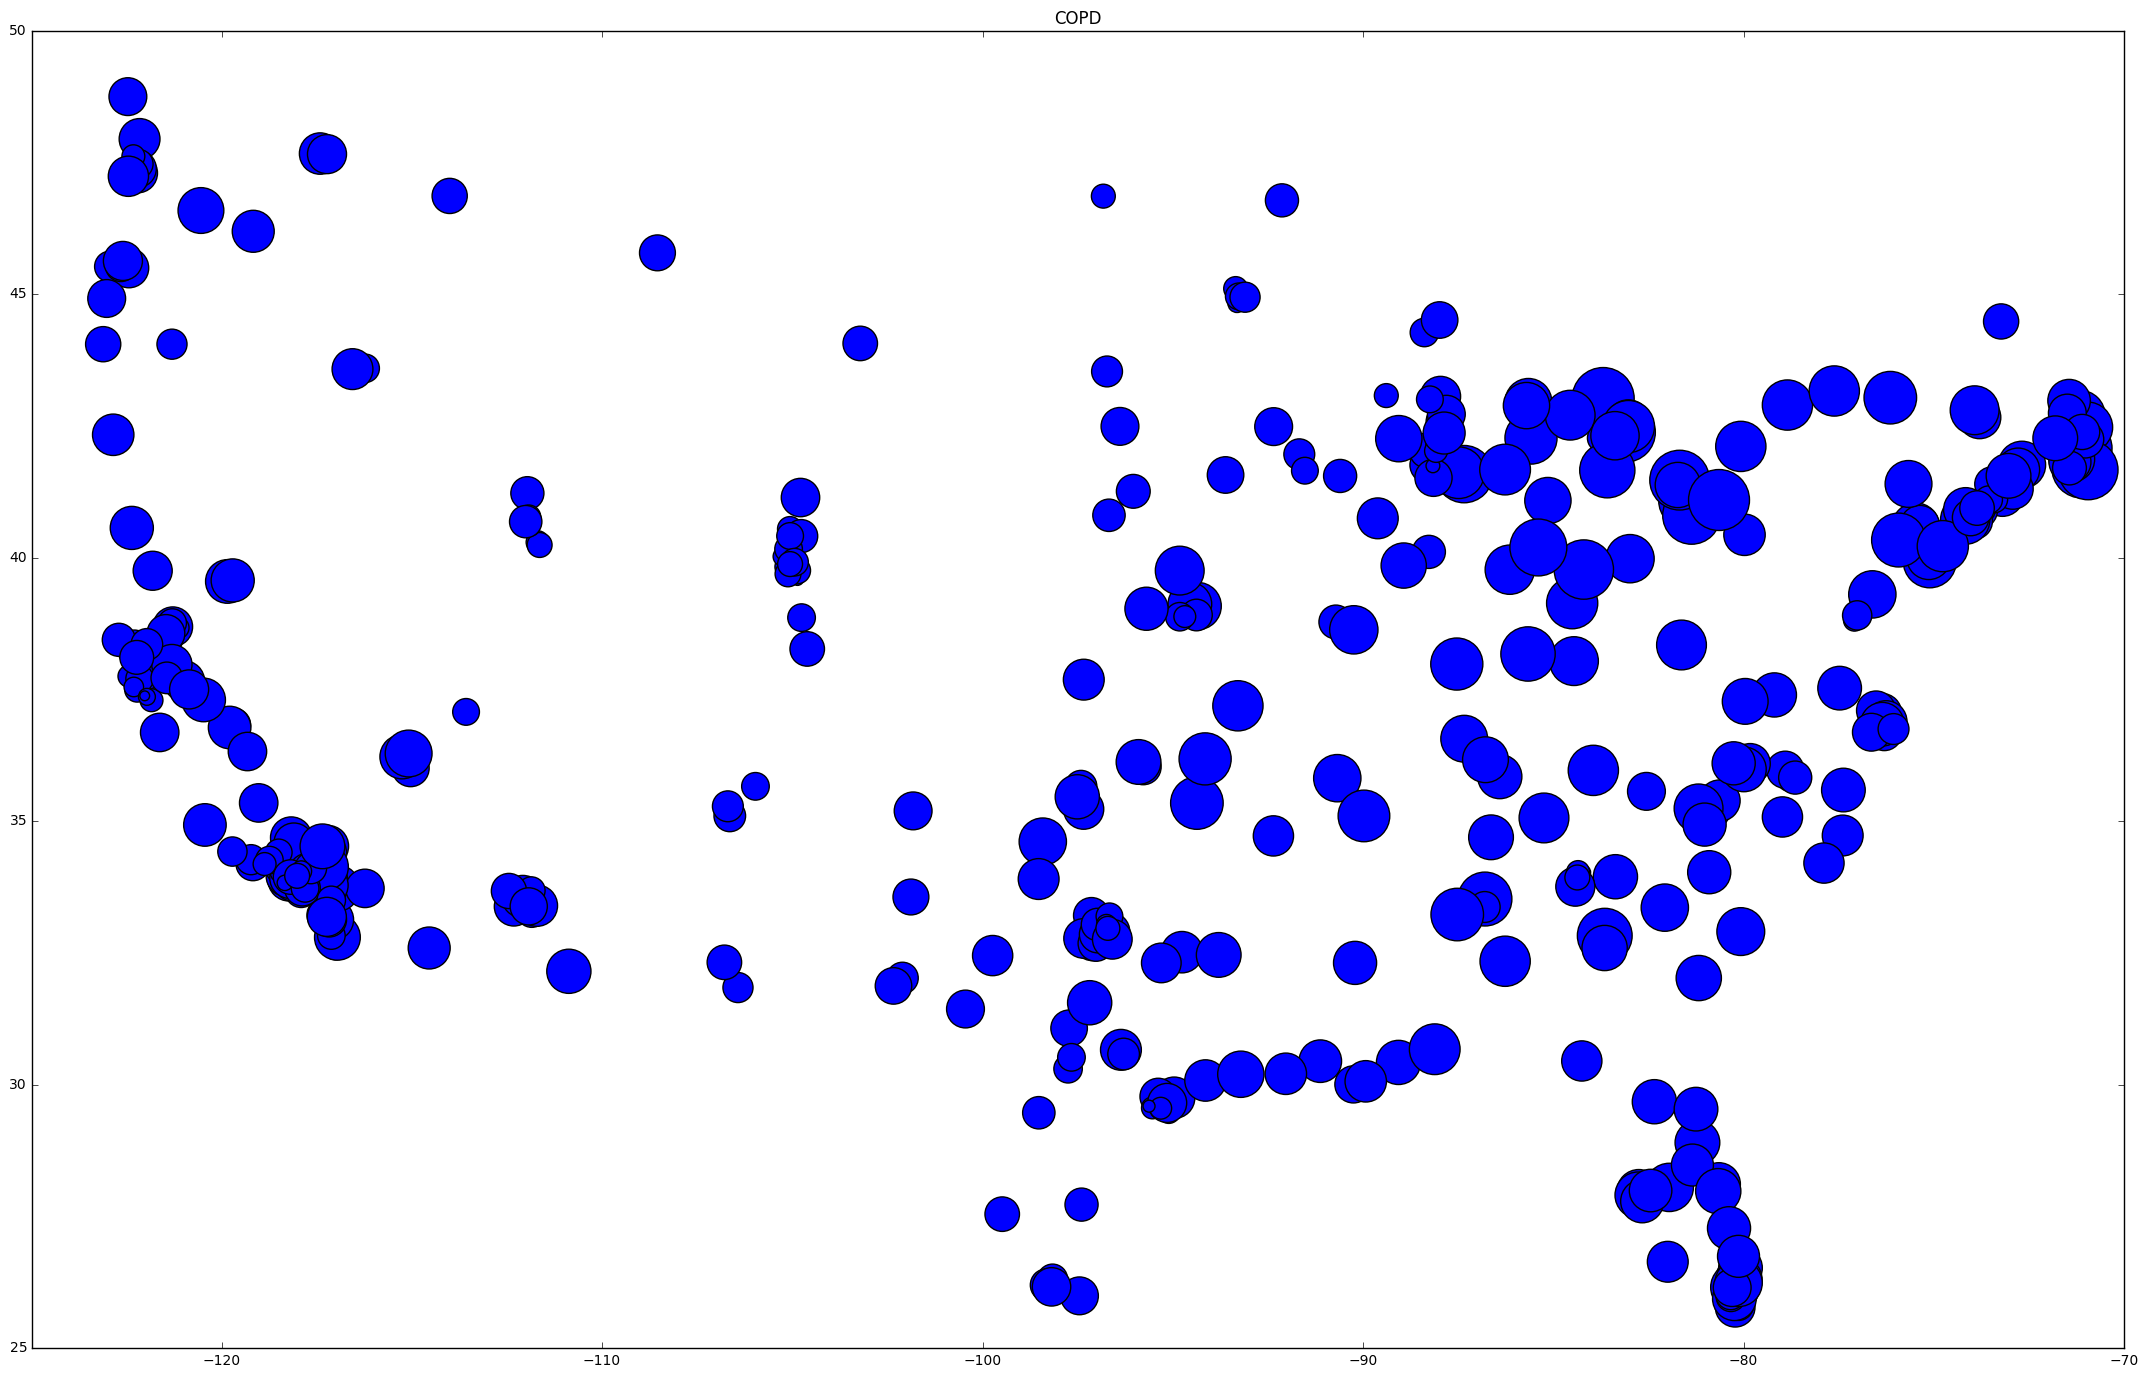

In [14]:
display(datacorr_df.GeoLong.shape)
display(datacorr_df.GeoLat.shape)
display(len(datacorr_df.GeoLat))



f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('COPD')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])

COPD_prev = (datacorr_df['COPD'] - minCOPD)/rangeCOPD
ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 2000*COPD_prev)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()

min = 4.1  max = 6.9  range = 2.8


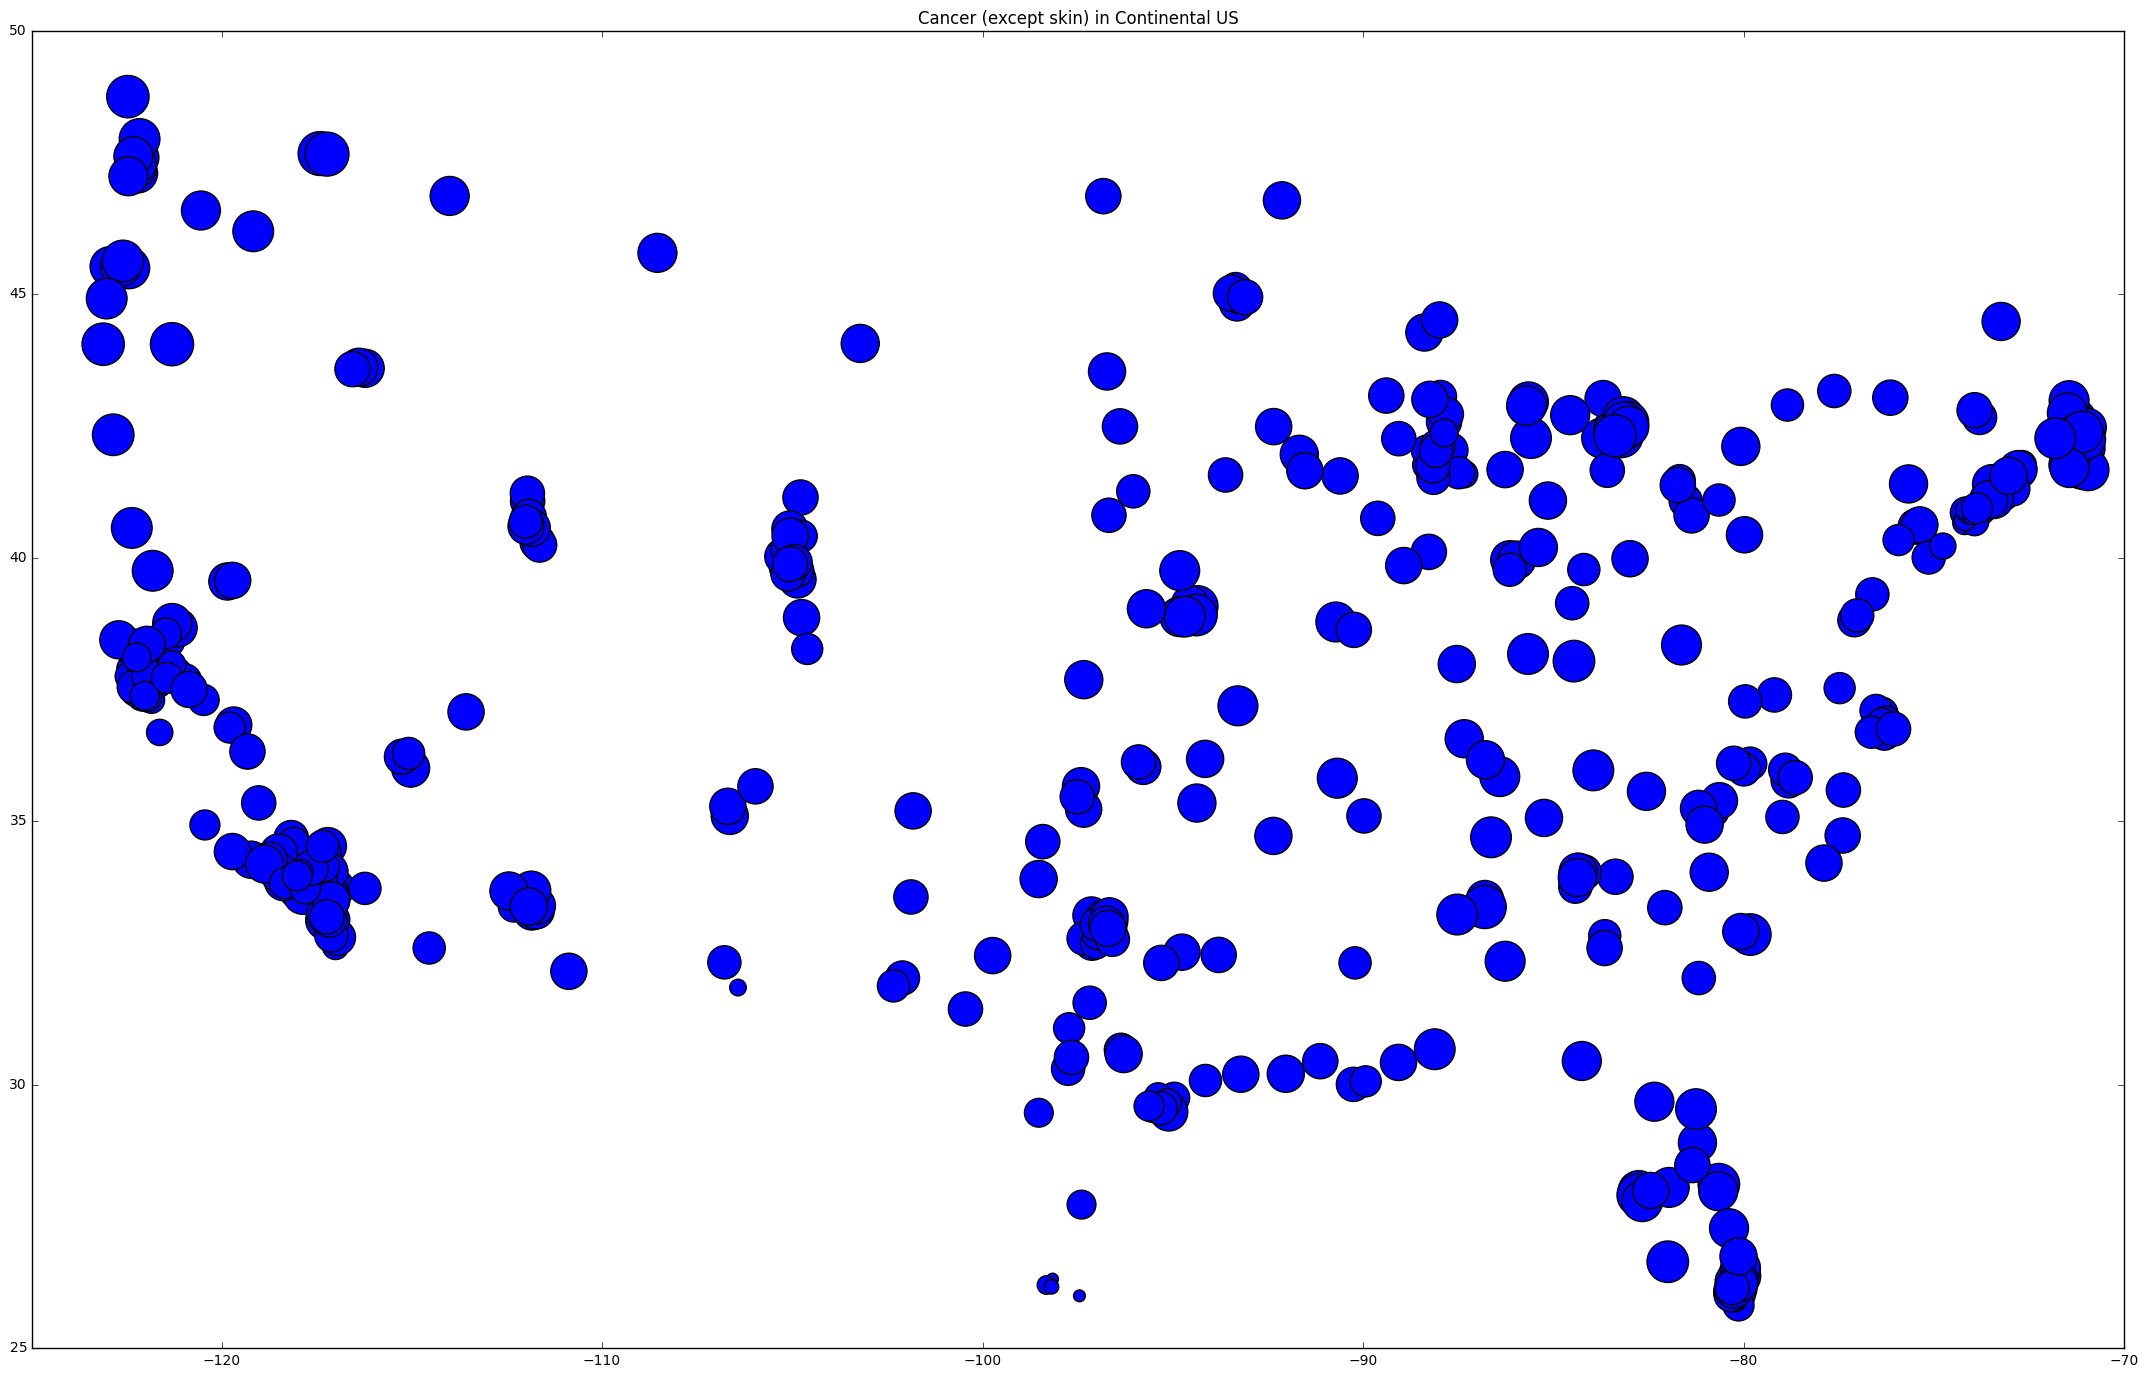

In [15]:
maxCancer = datacorr_df['Cancer (except skin)'].max()
minCancer = datacorr_df['Cancer (except skin)'].min()
rangeCancer = maxCancer - minCancer
print "min = {}  max = {}  range = {}".format(minCancer, maxCancer, rangeCancer)

Cancer_prev = (datacorr_df['Cancer (except skin)'] - minCancer)/rangeCancer
f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('Cancer (except skin) in Continental US')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])
ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 1000*Cancer_prev)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()

In [16]:
high_corr = datacorr_df.corr()
high_corr = high_corr[high_corr >= 0.85]
#display(high_corr)
#display(high_corr.head())
col_names = high_corr.columns
#display(high_corr.iloc[0].name)
#display(high_corr.iloc[0][0])
#display(col_names[0])
for item in high_corr.head().itertuples():
    for i in range(len(item)):
        if item[i] >= 0.85:
            print "{}   {}   {}".format(item.Index, col_names[i], item[i])
            #print "{}   {}".format(item.Index, col_names[i])
        
        
    
#display(item.index[0])
item[0]
'''for item in high_corr.itertuples():
    for col in item:
        if ite
'''        

Chronic Kidney Disease   Chronic Kidney Disease   Chronic Kidney Disease
Chronic Kidney Disease   COPD   1.0
COPD   Chronic Kidney Disease   COPD
COPD   Cancer (except skin)   1.0
COPD   Mental Health   0.878478155698
COPD   Teeth Loss   0.891465214175
COPD   Stroke   0.874828554074
COPD   GeoLat   0.920078015072
COPD   Physical Activity   0.912706265807
Cancer (except skin)   Chronic Kidney Disease   Cancer (except skin)
Cancer (except skin)   Arthritis   1.0
Arthritis   Chronic Kidney Disease   Arthritis
Arthritis   Cancer (except skin)   0.878478155698
Arthritis   Mental Health   1.0
Arthritis   Physical Activity   0.867117660798
Mental Health   Chronic Kidney Disease   Mental Health
Mental Health   Cancer (except skin)   0.891465214175
Mental Health   Teeth Loss   1.0
Mental Health   High Blood Pressure   0.939998993265
Mental Health   GeoLat   0.90097052692


'for item in high_corr.itertuples():\n    for col in item:\n        if ite\n'

adding some changes. adding more changes. 

In [69]:
high_corr = datacorr_df.corr()
high_corr['Stroke']


Chronic Kidney Disease    0.685028
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Mental Health             0.835944
Teeth Loss                0.885558
Stroke                    1.000000
High Cholesterol          0.530339
Current Asthma            0.677891
Diabetes                  0.877367
Physical Health           0.843972
High Blood Pressure       0.874823
Coronary Heart Disease    0.876573
GeoLat                   -0.059188
Current Smoking           0.780398
Physical Activity         0.813787
GeoLong                   0.364517
Binge Drinking           -0.489722
Sleep                     0.776520
Obesity                   0.852384
Name: Stroke, dtype: float64

In [67]:
high_corr['Stroke']

Chronic Kidney Disease    0.685028
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Mental Health             0.835944
Teeth Loss                0.885558
Stroke                    1.000000
High Cholesterol          0.530339
Current Asthma            0.677891
Diabetes                  0.877367
Physical Health           0.843972
High Blood Pressure       0.874823
Coronary Heart Disease    0.876573
GeoLat                   -0.059188
Current Smoking           0.780398
Physical Activity         0.813787
GeoLong                   0.364517
Binge Drinking           -0.489722
Sleep                     0.776520
Obesity                   0.852384
Name: Stroke, dtype: float64

In [91]:
#figure out how to generate a list of the names of things highly correlated 
#with stroke
stroke_preds = []
for i in range(len(high_corr['Stroke'])):
    val = high_corr['Stroke'][i]
    if val > 0.8:
        print "{}   {}".format(high_corr.axes[0][i], val)
        stroke_preds.append(high_corr.axes[0][i])

print stroke_preds



COPD   0.831702134952
Mental Health   0.835944251227
Teeth Loss   0.885558062872
Stroke   1.0
Diabetes   0.877367244945
Physical Health   0.843972193685
High Blood Pressure   0.874823345389
Coronary Heart Disease   0.876572867993
Physical Activity   0.813787042293
Obesity   0.852384375754
['COPD', 'Mental Health', 'Teeth Loss', 'Stroke', 'Diabetes', 'Physical Health', 'High Blood Pressure', 'Coronary Heart Disease', 'Physical Activity', 'Obesity']


In [92]:
stroke_preds.remove('Stroke')

In [93]:
print stroke_preds

['COPD', 'Mental Health', 'Teeth Loss', 'Diabetes', 'Physical Health', 'High Blood Pressure', 'Coronary Heart Disease', 'Physical Activity', 'Obesity']


In [ ]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.model_selection import cross_val_predict

In [40]:
#behaviors_df.head()
behaviors_only_df = behaviors_df.drop(['GeoLong'], axis = 1)
behaviors_only_df.head()


,GeoLat,Current Smoking,Physical Activity,Binge Drinking,Sleep,Obesity
Cities,,,,,,
Abilene,32.454651,19.6,27.7,16.2,35.4,33.7
Akron,41.080144,26.8,31.0,14.8,44.1,37.3
Alameda,37.765085,11.9,18.7,15.0,32.3,18.7
Albany,42.666397,19.0,26.1,15.5,39.7,31.1
Albuquerque,35.105503,18.8,20.4,14.5,32.8,25.5


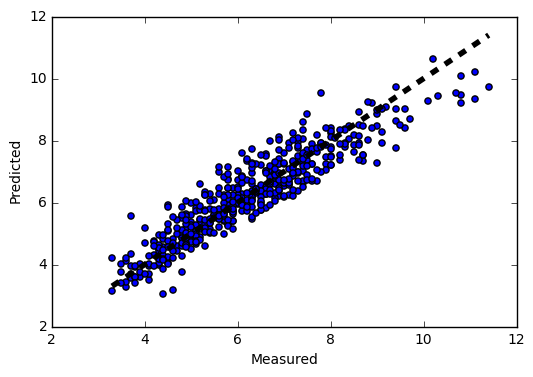

In [50]:
lr = LinearRegression()
X = behaviors_only_df[['GeoLat', 'Current Smoking', 'Physical Activity']]
y = outcomes_df.COPD
predicted = cross_val_predict(lr, X, y, cv = 10 )

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   random_state = 42)

In [53]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.77797270817411235

In [45]:
predicted = lr.predict(X_test)
len(X_test['Current Smoking'])


143

In [46]:
len(predicted)

143

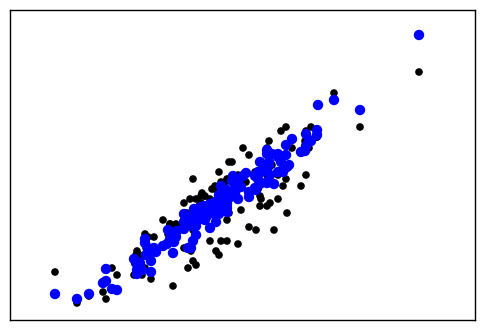

In [47]:
plt.scatter(X_test['Current Smoking'], y_test,  color='black')
plt.scatter(X_test['Current Smoking'], lr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())


plt.show()

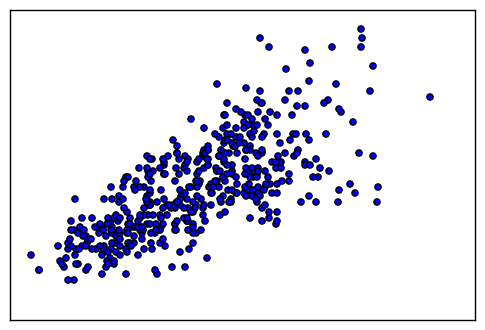

In [56]:
plt.scatter(X['Physical Activity'], y)


plt.xticks(())
plt.yticks(())


plt.show()


In [96]:
stroke_y = datacorr_df['Stroke']
display(stroke_y.head())
stroke_X = datacorr_df[stroke_preds]
display(stroke_X.head())

Cities
Abilene        3.1
Akron          3.9
Alameda        2.2
Albany         3.3
Albuquerque    2.6
Name: Stroke, dtype: float64

,COPD,Mental Health,Teeth Loss,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease,Physical Activity,Obesity
Cities,,,,,,,,,
Abilene,6.7,11.6,14.3,10.9,12.6,31.6,6.3,27.7,33.7
Akron,9.4,15.3,23.6,13.0,15.5,36.2,7.5,31.0,37.3
Alameda,4.3,9.8,7.5,8.1,9.6,24.3,4.5,18.7,18.7
Albany,7.1,13.2,16.5,10.9,13.1,33.4,6.0,26.1,31.1
Albuquerque,5.4,11.6,14.0,9.3,12.1,25.9,5.3,20.4,25.5


In [97]:
X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.3,
                                                   random_state = 42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.91679610837475789

In [98]:
predicted = lr.predict(X_test)

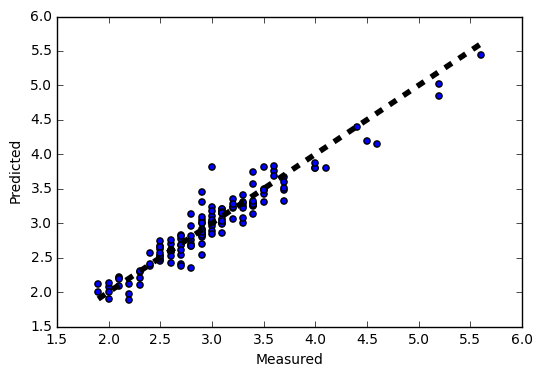

In [99]:

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()